In [161]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [162]:
api_key='#######################################'
channel_id='########################'
youtube=build('youtube','v3', developerKey=api_key)

In [163]:
def get_channel_stats(youtube, channel_id):
    request=youtube.channels().list(part='Snippet, ContentDetails, Statistics',id=channel_id)
    response=request.execute()
    return response['items']
channel_stats=get_channel_stats(youtube, channel_id)
channel_stats

HttpError: <HttpError 400 when requesting https://youtube.googleapis.com/youtube/v3/channels?part=Snippet%2C+ContentDetails%2C+Statistics&id=%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23&key=%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23%23&alt=json returned "API key not valid. Please pass a valid API key.". Details: "[{'message': 'API key not valid. Please pass a valid API key.', 'domain': 'global', 'reason': 'badRequest'}]">

In [ ]:
upload_id=channel_stats[0]['contentDetails']['relatedPlaylists']['uploads']
print(upload_id)
print(channel_stats[0]['statistics'])


UUNU_lfiiWBdtULKOw6X0Dig
{'viewCount': '82757693', 'subscriberCount': '822000', 'hiddenSubscriberCount': False, 'videoCount': '1727'}


In [ ]:
def get_videos_list(youtube, upload_id):
    video_list=[]
    request=youtube.playlistItems().list(part='snippet,contentDetails',playlistId=upload_id,maxResults=50)
    next_page=True
    while next_page:
        response=request.execute()
        data=response['items']
        for video in data:
            video_id=video['contentDetails']['videoId']
            if video_id not in video_list:
                video_list.append(video_id)
        if 'nextPageToken' in response.keys():
            next_page=True
            request=youtube.playlistItems().list(part='snippet,contentDetails',playlistId=upload_id,maxResults=50,pageToken=response['nextPageToken'])
        else:
            next_page=False
    return video_list
video_list=get_videos_list(youtube, upload_id)
video_list

['YT3GoxjXhIc',
 '86BKEv0X2xU',
 'uii05OE2kjs',
 'lDWUJiivMX8',
 '61CFTi_Cv_4',
 'vIrUK7XYgdo',
 'u6SSI1i_WDg',
 'S0VE0OEg_Mo',
 'rLfaX6JtoDg',
 'ekSduyKsiWw',
 'VNfalYYduD4',
 'lv5IEOItgWM',
 'yxwS8Z7v880',
 'c63bTKjwfaQ',
 'ogjO1evIX_c',
 'A0kDpPMXyY0',
 'Apa373mJ1mQ',
 'GxDsZ8sakOQ',
 'efpARWCsuFo',
 'lJCsVBccQgk',
 'WFLbNu-mCBc',
 'W6H20V7JQ1E',
 's0RxGFdpSjE',
 'B2scdmTZ834',
 'V7ZiWIcdu74',
 'WeR301q9wRc',
 'cgc3dSEAel0',
 'cnY6jQlJcQc',
 'i_FtfdOKa2M',
 'pUUcLQRIkIM',
 'pG7_V2MgJj0',
 'RnzC2ULvp5I',
 'PxCCzJndruQ',
 'pxk1Fr33-L4',
 'mHQPzVse2oA',
 'qdcHHrsXA48',
 'T92r0EFNslM',
 'Iq7H-RPaWMk',
 'zS1QUCvAkpE',
 'fbrPaKLGd1o',
 'kSr1dXRgcyw',
 'G56dwY2CG5w',
 'qDxCYmLWUyQ',
 'zRdzLfoTwvQ',
 'CbpsDMwFG2g',
 'Le-A72NjaWs',
 'PDoZb4HVM5k',
 'Y9mxx1Mer0I',
 'tv7rn5AsxFY',
 'rRlsspJObIU',
 '5Ghv-F1wF_0',
 't2bSApmPzU4',
 '_FpT1cwcSLg',
 '7fPvKahR4Eg',
 '2m7Pgl-84F8',
 'KZ1mWboXE6g',
 'BGlEv2CTfeg',
 'a22OPjS-4Lc',
 'OS9xRGKfx4E',
 'p1bfK8ZJgkE',
 'Ixh514eMvIw',
 'p7V4Aa7qEpw',
 'ZWxdQD

In [ ]:
def get_video_details(youtube, video_list):
    status_list=[]
    for i in range(0,len(video_list), 50):
        request=youtube.videos().list(part='Snippet, ContentDetails,Statistics', id=video_list[i:i+50])
        data=request.execute()
        for video in data['items']:
            title=video['snippet']['title']
            published=video['snippet']['publishedAt']
            tag_count=len(video['snippet'].get('tags',[]))
            view_count=video['statistics'].get('viewCount',0)
            like_count=video['statistics'].get('likeCount',0)
            dislike_count=video['statistics'].get('dislikeCount',0)
            comment_count=video['statistics'].get('commentCount',0)
            subs_count=video['statistics'].get('subscriberCount',0)

        status_dictionary=dict(Title=title,Published=published,Tags=tag_count,View=view_count,Like=like_count,Dislike=dislike_count,Comments=comment_count)
        status_list.append(status_dictionary)
    return status_list
channel_status=get_video_details(youtube, video_list)
channel_status

[{'Title': 'How OpenAI Will Change the Future- Sharing My Experience After Using It',
  'Published': '2023-06-16T16:13:54Z',
  'Tags': 19,
  'View': '11402',
  'Like': '361',
  'Dislike': 0,
  'Comments': '34'},
 {'Title': 'Successful Data Science Career Transition Of Shiva To Cisco With High Package @iNeuroniNtelligence',
  'Published': '2023-02-14T13:29:58Z',
  'Tags': 6,
  'View': '6024',
  'Like': '159',
  'Dislike': 0,
  'Comments': '23'},
 {'Title': 'Need All Your Help To Test NeuroLabs Coding Platform  Today At 6pm',
  'Published': '2022-10-22T07:23:40Z',
  'Tags': 0,
  'View': '6045',
  'Like': '249',
  'Dislike': 0,
  'Comments': '41'},
 {'Title': 'Data Science Mock Interview iNeuron FSDS Batch With Feedbacks',
  'Published': '2022-08-21T10:50:58Z',
  'Tags': 5,
  'View': '18553',
  'Like': '471',
  'Dislike': 0,
  'Comments': '19'},
 {'Title': 'Prerequisites For NLP Live Community Session For ML And DL',
  'Published': '2022-06-13T10:47:40Z',
  'Tags': 10,
  'View': '21044',


In [ ]:
def total_subscribers(youtube, channel_id):
    channel_data = youtube.channels().list(part='statistics',id=channel_id).execute()
    subscriber_count =int(channel_data['items'][0]['statistics']['subscriberCount'])
    print(f'Subscriber Count: {subscriber_count}')
total_subscribers(youtube, channel_id)


Subscriber Count: 822000


In [ ]:
df=pd.DataFrame(channel_status)
df.head()

,Title,Published,Tags,View,Like,Dislike,Comments
0,How OpenAI Will Change the Future- Sharing My ...,2023-06-16T16:13:54Z,19,11402,361,0,34
1,Successful Data Science Career Transition Of S...,2023-02-14T13:29:58Z,6,6024,159,0,23
2,Need All Your Help To Test NeuroLabs Coding Pl...,2022-10-22T07:23:40Z,0,6045,249,0,41
3,Data Science Mock Interview iNeuron FSDS Batch...,2022-08-21T10:50:58Z,5,18553,471,0,19
4,Prerequisites For NLP Live Community Session F...,2022-06-13T10:47:40Z,10,21044,644,0,19


In [ ]:
def date_time(df):
    df['Published'] = pd.to_datetime(df['Published'])
    df['Date'] = df['Published'].dt.date
    df['Time'] = df['Published'].dt.time
    return df
df=date_time(df)

In [ ]:
df.head()

,Title,Published,Tags,View,Like,Dislike,Comments,Date,Time
0,How OpenAI Will Change the Future- Sharing My ...,2023-06-16 16:13:54+00:00,19,11402,361,0,34,2023-06-16,16:13:54
1,Successful Data Science Career Transition Of S...,2023-02-14 13:29:58+00:00,6,6024,159,0,23,2023-02-14,13:29:58
2,Need All Your Help To Test NeuroLabs Coding Pl...,2022-10-22 07:23:40+00:00,0,6045,249,0,41,2022-10-22,07:23:40
3,Data Science Mock Interview iNeuron FSDS Batch...,2022-08-21 10:50:58+00:00,5,18553,471,0,19,2022-08-21,10:50:58
4,Prerequisites For NLP Live Community Session F...,2022-06-13 10:47:40+00:00,10,21044,644,0,19,2022-06-13,10:47:40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Title      34 non-null     object             
 1   Published  34 non-null     datetime64[ns, UTC]
 2   Tags       34 non-null     int64              
 3   View       34 non-null     object             
 4   Like       34 non-null     object             
 5   Dislike    34 non-null     int64              
 6   Comments   34 non-null     object             
 7   Date       34 non-null     object             
 8   Time       34 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 2.5+ KB


In [ ]:
def Dtype(df):
    df['View']=pd.to_numeric(df['View'])
    df['Like']=pd.to_numeric(df['Like'])
    df['Date'] = pd.to_datetime(df['Date'])
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    df['Comments']=pd.to_numeric(df['Comments'])
    df['Time'] = pd.to_datetime(df['Time'])
    df['Video Upload Hours'] = df['Time'].dt.hour
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
Dtype(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Title               34 non-null     object             
 1   Published           34 non-null     datetime64[ns, UTC]
 2   Tags                34 non-null     int64              
 3   View                34 non-null     int64              
 4   Like                34 non-null     int64              
 5   Dislike             34 non-null     int64              
 6   Comments            34 non-null     int64              
 7   Date                34 non-null     datetime64[ns]     
 8   Time                34 non-null     datetime64[ns]     
 9   Video Upload Hours  34 non-null     int64              
 10  Month               34 non-null     int64              
 11  Year                34 non-null     int64              
dtypes: datetime64[ns, UTC](1), datetime64[

In [ ]:
df['View'] = pd.to_numeric(df['View'], errors='coerce')
filelar = df.nlargest(10, "View" )[['Title','View']]
filelar

,Title,View
30,What is Cross Validation and its types?,204444
32,Natural Language Processing|Tokenization,174004
26,"Tutorial 33- P Value,T test, Correlation Imple...",146032
31,Tutorial 29-R square and Adjusted R square Cle...,135301
21,Sequence To Sequence Learning With Neural Netw...,107424
8,Meet iNeuron Team,57532
28,Tutorial 16- Filter Functions In Python,56725
17,Time Series Forecasting Using Facebook FbProphet,54595
22,Successful Transition Story From Mechanical En...,51191
11,Building Url Dynamically In Flask Web Framework,39057


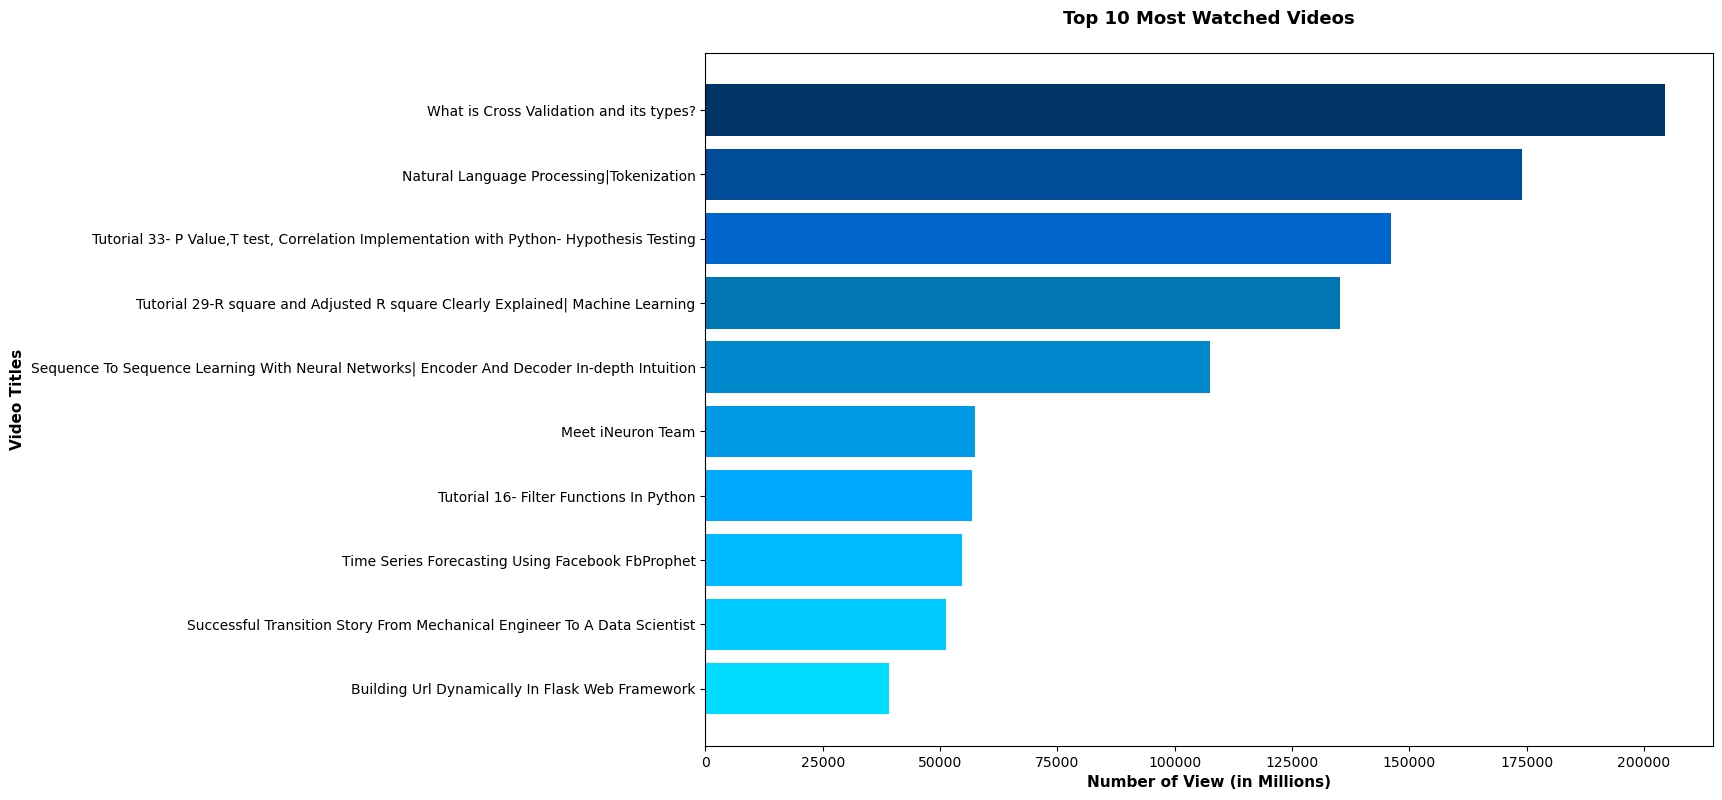

In [ ]:
colors_ttmwv = ['#003366', '#004c99', '#0066cc', '#0077b3', '#0088cc','#0099e6', '#00aaff', '#00bbff', '#00ccff', '#00ddff']
plt.figure(figsize=(13, 9))
plt.barh(filelar['Title'], filelar['View'],color=colors_ttmwv)
plt.xlabel('Number of View (in Millions)',fontsize=11,fontweight='bold')
plt.ylabel('Video Titles',fontsize=11,fontweight='bold')
plt.title('Top 10 Most Watched Videos\n',fontsize=13, fontweight='bold')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
bottom_10_least_viewed_videos = df.nsmallest(10, 'View')[['Title', 'View']]
bottom_10_least_viewed_videos

,Title,View
27,Data Scientist Vs Machine Learning Researcher ...,3416
13,Friday Live Q&A Ask Anything Related Data Science,4122
12,"Tools, Softwares And Tips For Virtual Live Int...",5013
23,Tutorial 9 - PowerQuery Text Transformation,5161
33,Maeri unplugged by Krish and band,5371
1,Successful Data Science Career Transition Of S...,6024
2,Need All Your Help To Test NeuroLabs Coding Pl...,6045
25,Tutorial 4- Basics Of Linux And Practical Imp...,7456
15,Live Virtual Mock Interview On Data Science In...,9138
10,What I Hate About Job Interviews?,9450


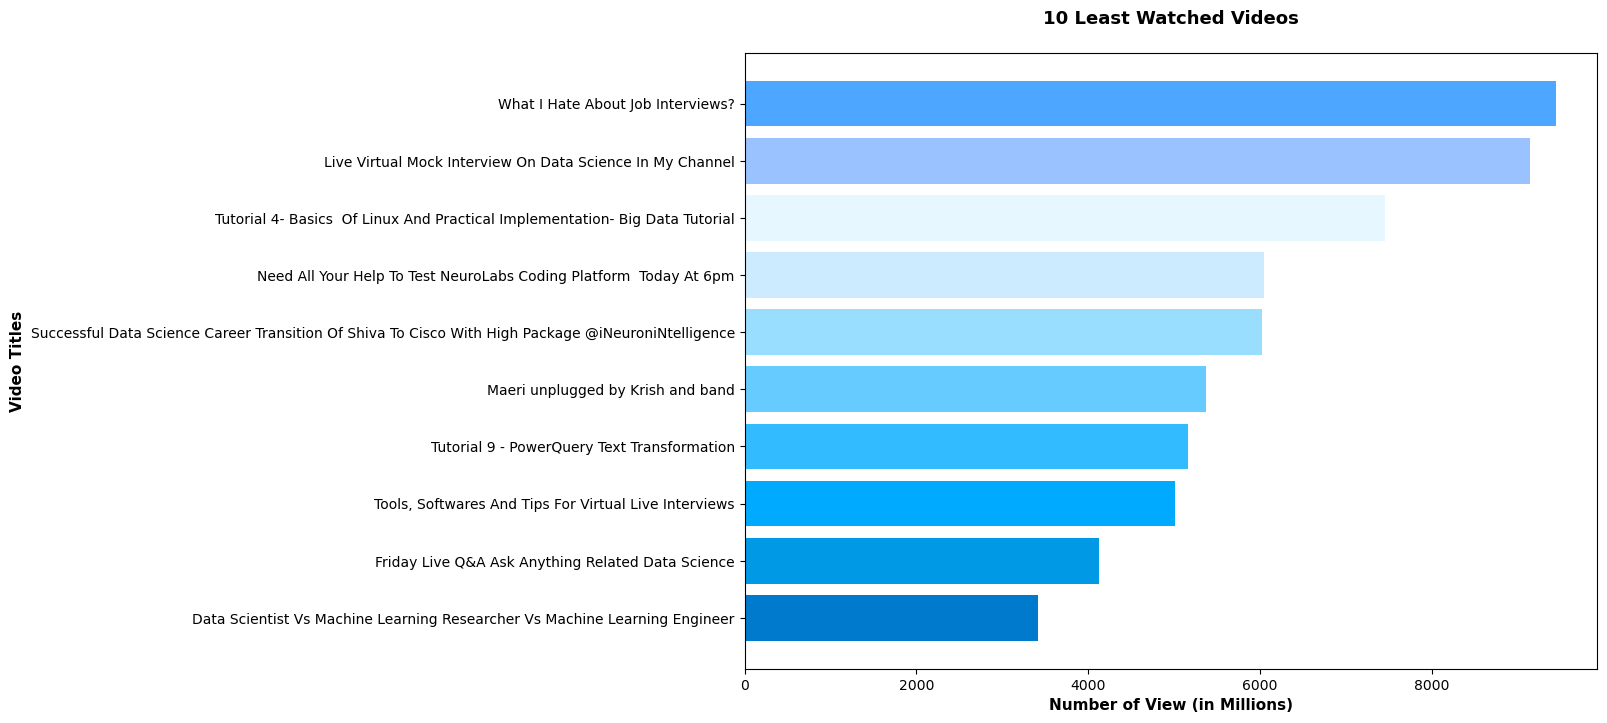

In [ ]:
colors_lwv =['#007acc', '#0099e6', '#00aaff', '#33bbff', '#66ccff', '#99ddff','#ccebff', '#e6f7ff', '#99c2ff', '#4da6ff']
plt.figure(figsize=(11, 8))
plt.barh(bottom_10_least_viewed_videos['Title'],bottom_10_least_viewed_videos['View'], color=colors_lwv)
plt.xlabel('Number of View (in Millions)',fontsize=11,fontweight='bold')
plt.ylabel('Video Titles',fontsize=11,fontweight='bold')
plt.title('10 Least Watched Videos\n',fontsize=13, fontweight='bold')
plt.show()

In [ ]:
df['Like'] = pd.to_numeric(df['Like'], errors='coerce')

filelar = df.nlargest(10, "Like" )[['Title','Like']]
filelar

,Title,Like
30,What is Cross Validation and its types?,5071
32,Natural Language Processing|Tokenization,2739
31,Tutorial 29-R square and Adjusted R square Cle...,2709
26,"Tutorial 33- P Value,T test, Correlation Imple...",2352
21,Sequence To Sequence Learning With Neural Netw...,2278
8,Meet iNeuron Team,1777
22,Successful Transition Story From Mechanical En...,1540
18,Path of Non Technical Person Towards Data Anal...,1432
17,Time Series Forecasting Using Facebook FbProphet,1056
28,Tutorial 16- Filter Functions In Python,988


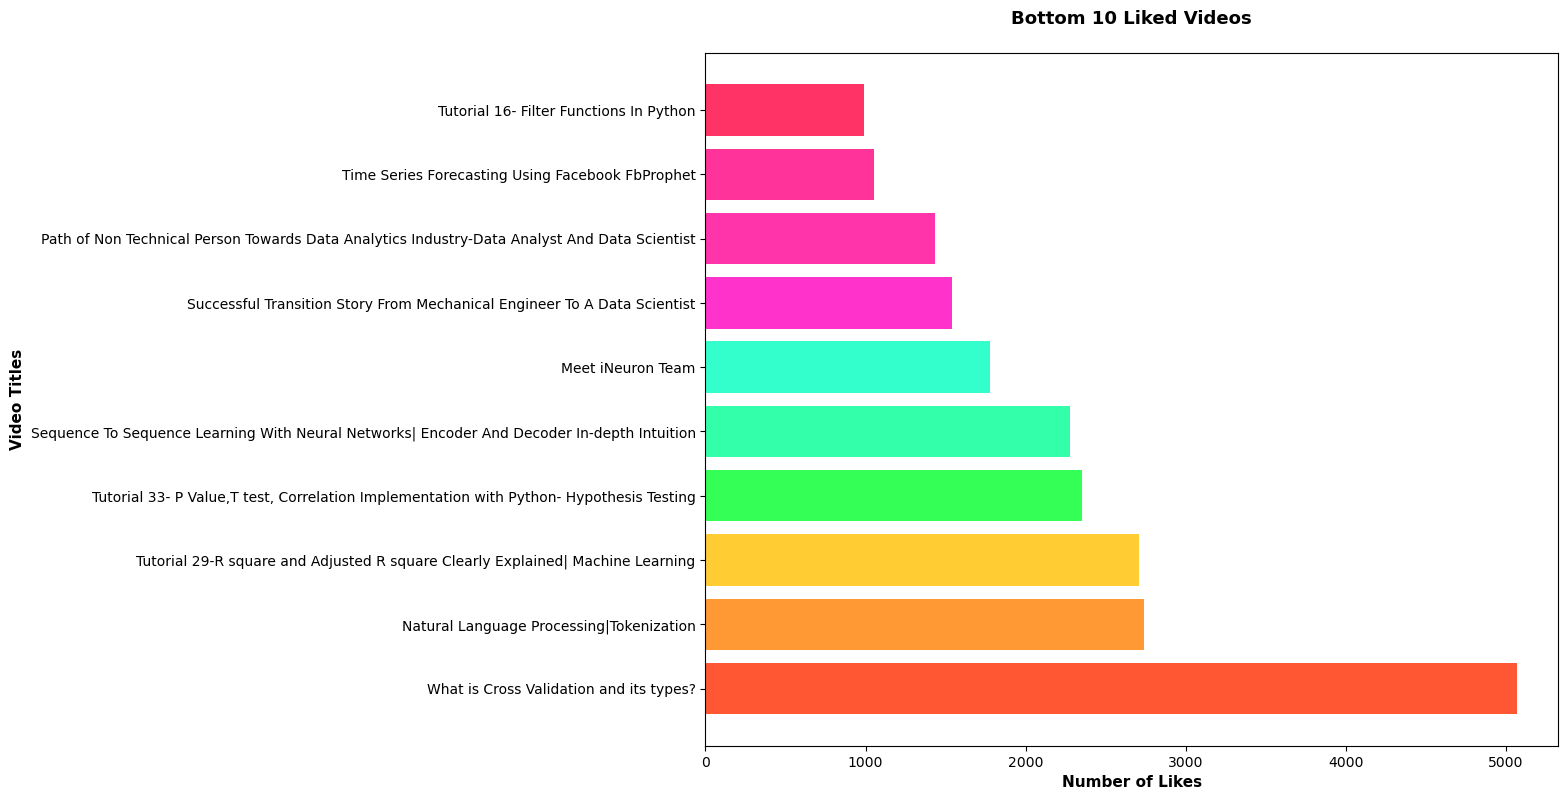

In [ ]:
colors_blv = ['#ff5733', '#ff9933', '#ffcc33', '#33ff57', '#33ffaa', '#33ffcc','#ff33cc', '#ff33aa', '#ff3399', '#ff3366']
plt.figure(figsize=(11, 9))
plt.barh(filelar['Title'], filelar['Like'],color=colors_blv)
plt.xlabel('Number of Likes',fontsize=11,fontweight='bold')
plt.ylabel('Video Titles',fontsize=11,fontweight='bold')
plt.title('Bottom 10 Liked Videos\n',fontsize=13, fontweight='bold')
plt.show()


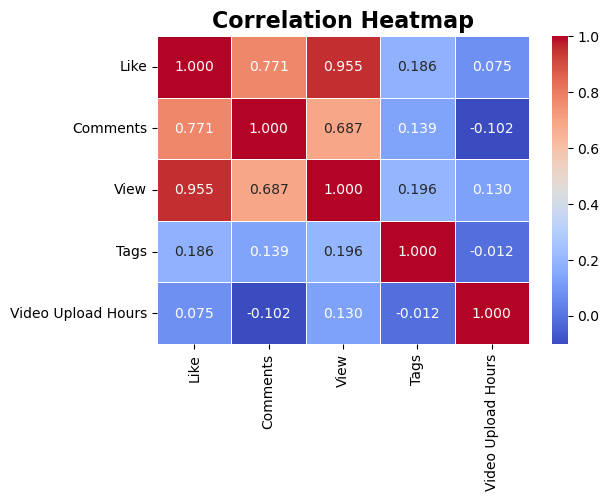

In [ ]:
correlation_matrix = df[['Like', 'Comments', 'View','Tags','Video Upload Hours']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f',linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

In [ ]:
def Channel_stats(df):
    total_dislikes=df['Dislike'].sum()
    total_views=df['View'].sum()
    total_likes=df['Like'].sum()
    total_comments=df['Comments'].sum()
    print(f'Total dislikes on the videos: {total_dislikes}')
    print(f'Total likes on the videos: {total_likes}')
    print(f'Total Views on the channel: {total_views}')
    print(f'Total comments on the videos: {total_comments}')
Channel_stats(df)


Total dislikes on the videos: 0
Total likes on the videos: 30604
Total Views on the channel: 1377286
Total comments on the videos: 1826


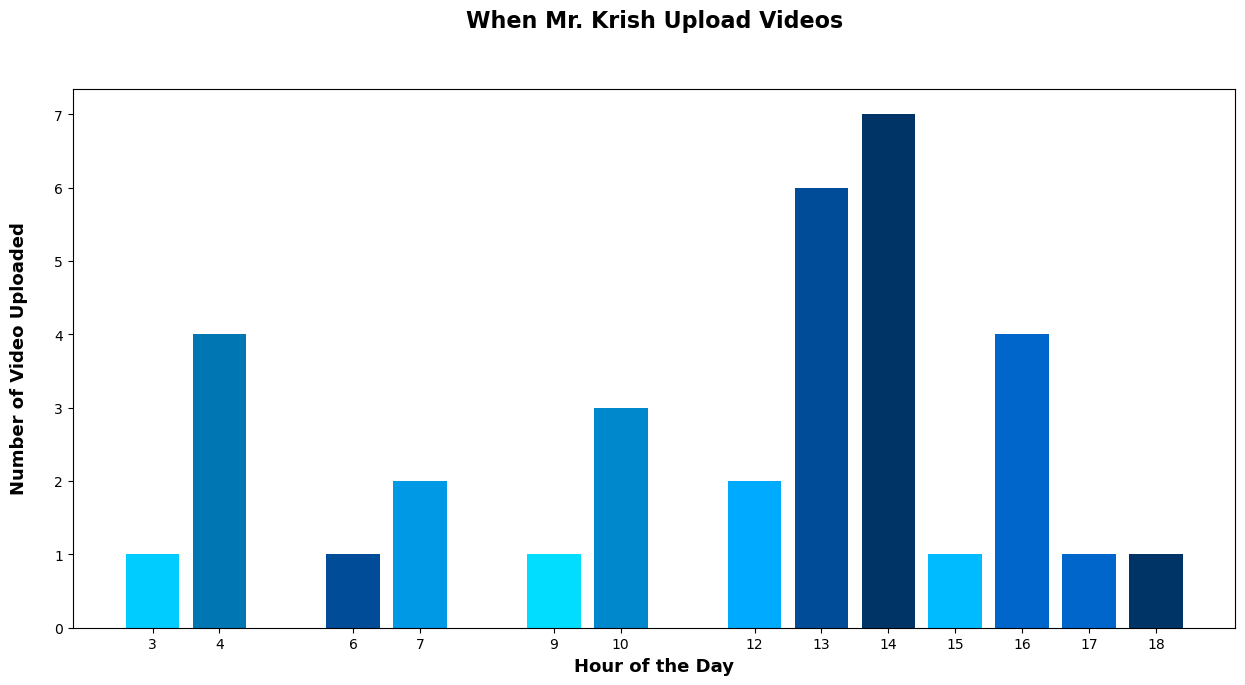

In [ ]:
color_muvh = ['#003366', '#004c99', '#0066cc', '#0077b3', '#0088cc', '#0099e6','#00aaff', '#00bbff', '#00ccff', '#00ddff']
most_used_hours=df['Video Upload Hours'].value_counts()
plt.figure(figsize=(15, 7))
plt.bar(most_used_hours.index, most_used_hours.values, color=color_muvh)
plt.xlabel('Hour of the Day', fontsize=13,fontweight='bold')
plt.ylabel('Number of Video Uploaded\n',fontsize=13,fontweight='bold')
plt.title('When Mr. Krish Upload Videos\n \n',fontsize=16, fontweight='bold')
plt.xticks(most_used_hours.index)
plt.show()


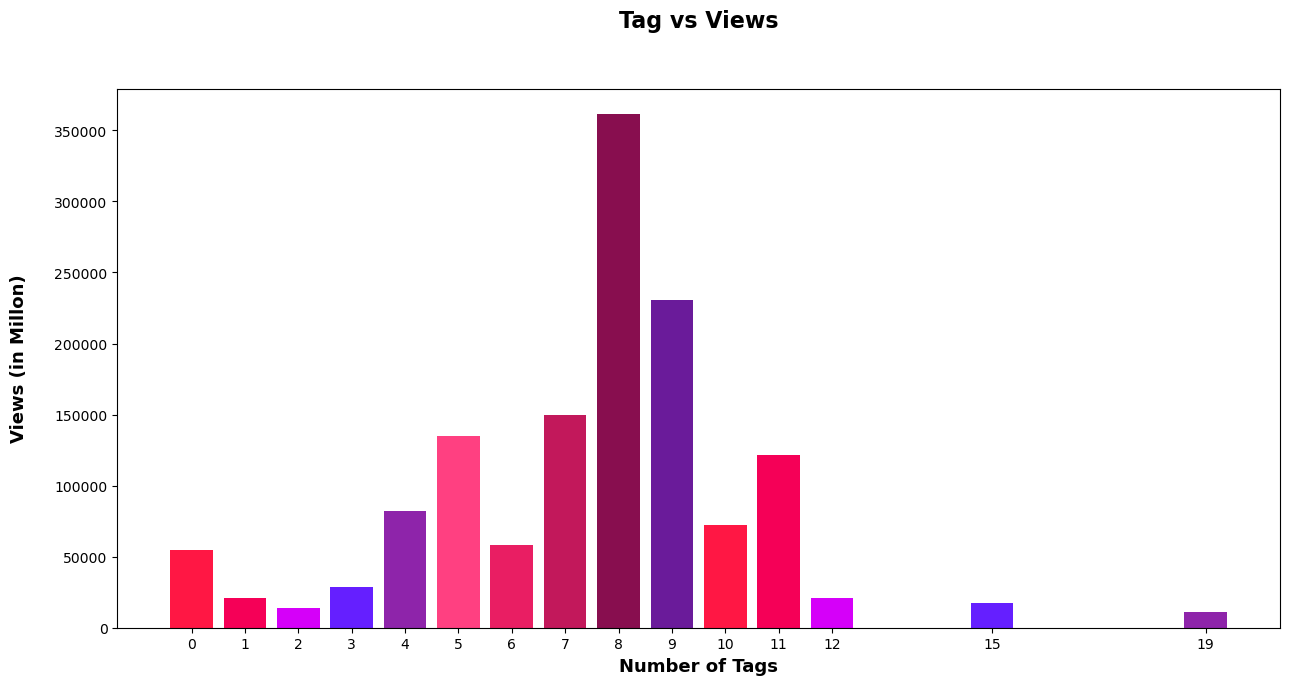

In [ ]:
colors_tvv =['#FF1744', '#F50057', '#D500F9', '#651FFF', '#8E24AA', '#FF4081','#E91E63', '#C2185B', '#880E4F', '#6A1B9A']
tag_vs_view=df.groupby('Tags')['View'].sum()
plt.figure(figsize=(15, 7))
plt.bar(tag_vs_view.index, tag_vs_view.values, color=colors_tvv)
plt.xlabel('Number of Tags', fontsize=13,fontweight='bold')
plt.ylabel('Views (in Millon)\n',fontsize=13,fontweight='bold')
plt.title('Tag vs Views\n \n',fontsize=16, fontweight='bold')
plt.xticks(tag_vs_view.index)
plt.show()

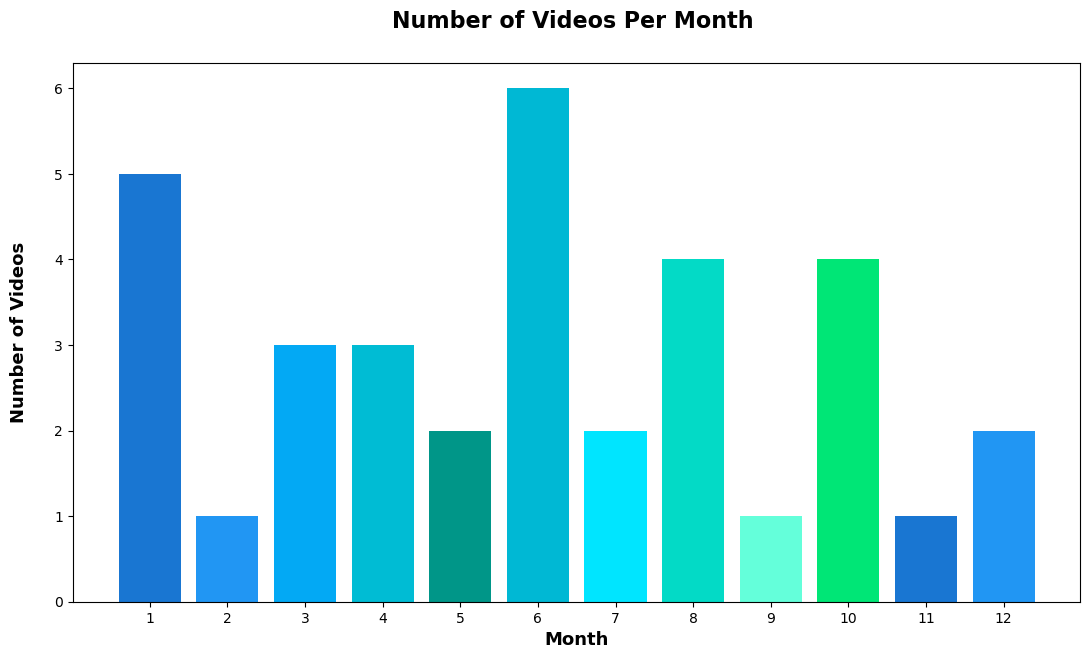

In [ ]:
videos_per_month= df.groupby( 'Month').size()
colors = ['#1976D2', '#2196F3', '#03A9F4', '#00BCD4', '#009688', '#00B8D4','#00E5FF', '#03DAC6', '#64FFDA', '#00E676']
plt.figure(figsize=(13, 7))
plt.bar(videos_per_month.index, videos_per_month.values, color=colors)
plt.xlabel('Month', fontsize=13,fontweight='bold')
plt.ylabel('Number of Videos\n',fontsize=13,fontweight='bold')
plt.title('Number of Videos Per Month \n',fontsize=16, fontweight='bold')
plt.xticks(videos_per_month.index)
plt.show()

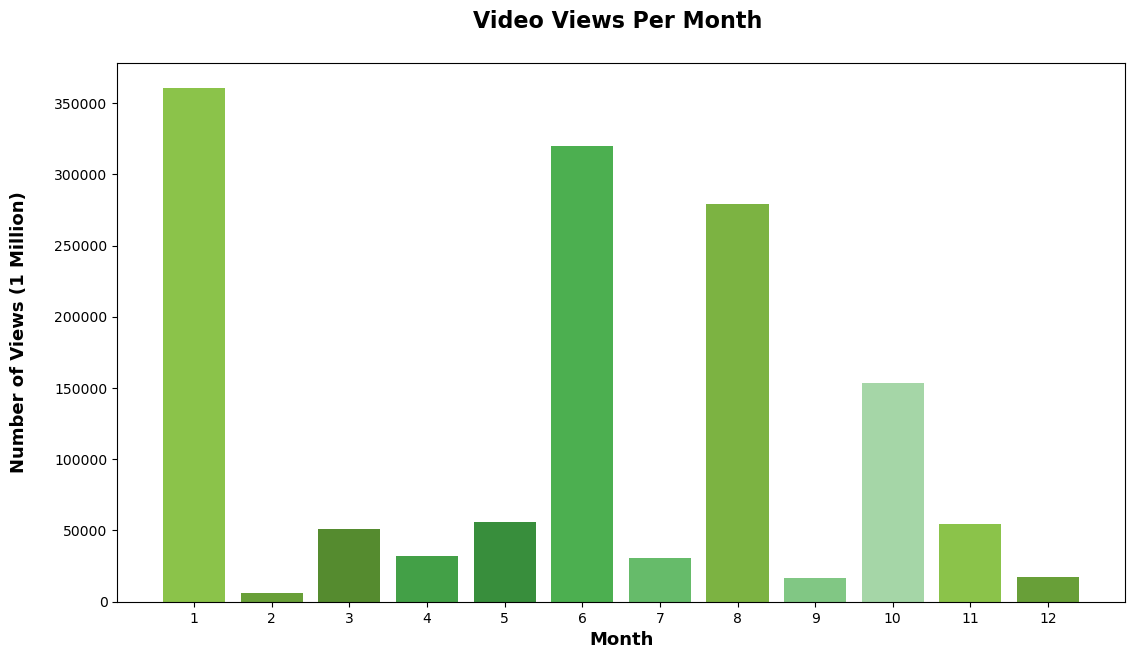

In [ ]:
views_per_month = df.groupby( 'Month')['View'].sum()
colors_vpm= ['#8BC34A', '#689F38', '#558B2F', '#43A047', '#388E3C', '#4CAF50','#66BB6A', '#7CB342', '#81C784', '#A5D6A7']
plt.figure(figsize=(13, 7))
plt.bar(views_per_month.index, views_per_month.values, color=colors_vpm)
plt.xlabel('Month', fontsize=13,fontweight='bold')
plt.ylabel('Number of Views (1 Million)\n',fontsize=13,fontweight='bold')
plt.title('Video Views Per Month \n',fontsize=16, fontweight='bold')
plt.xticks(views_per_month.index)
plt.show()

In [ ]:
def Performance_check(df):
    df['Performance'] = 'Not Good'
    df.loc[df['View'] >= 50000, 'Performance'] = 'Good Performed'
    df.loc[(df['View'] < 50000) & (df['View'] >= 30000), 'Performance'] = 'Average Performed'
    df.loc[df['View'] < 30000, 'Performance'] = 'Poor Performed'
Performance_check(df)

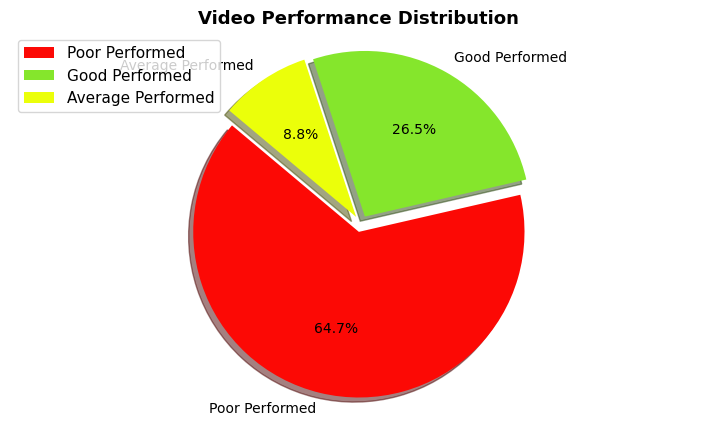

In [ ]:
performance_counts = df['Performance'].value_counts()
explode = (0.05, 0.05, 0.05)
colors = ['#fc0905', '#85e62c','#ebff0a']
plt.figure(figsize=(9, 5))
plt.pie(performance_counts, labels=performance_counts.index, autopct='%1.1f%%',startangle=140,
explode=explode, colors=colors, shadow=True)
plt.title('Video Performance Distribution',fontsize=13,fontweight='bold')
plt.axis('equal')
plt.legend(loc="best", labels=performance_counts.index,fontsize=11)
plt.show()

In [ ]:
YT_earnings=round((df['View'].sum()/1000)*0.6,2)
print(f'Estimate total earning From this YouTube channel is ${YT_earnings}')

Estimate total earning From this YouTube channel is $826.37
